In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chisquare
import seaborn as sns



df = pd.read_csv(r'C:\Users\user\Downloads\WA_Fn-UseC_-Telco-Customer-Churn (1).csv')

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


7403 kişinin bilgileri bulunmaktadır. Bu kişilerin %16'sı yetişkindir. Ortalama aylık ödeme miktarı 64.761692, min 18.250000 ve max 118.750000'dir. Müşteriler ortalama 32.371149 ay firmaya abone kalmaktadır. En uzun abonelik süresi 72 aydır.

In [5]:
df.shape

(7043, 21)

7043 satır, 21 sütun bulunmaktadır.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


21 sütun içerisinde 3 tane nümerik, 18 tane kategorik sütun vardır. Nümerik veri olması gereken 'TotalCharges' kategorik veri olarak gözükmektedir. Bu sütunu nümerik veri tipine dönüştürdüm.

In [8]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors = 'coerce')

In [9]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Veri seti içerisinde 'TotalCharges' sütununda eksik veri bulunmaktadır. Bu eksik verileri müşterilerin abone kalma süreleri ve aylık ödeme miktarının çarpımı ile doldurdum.

In [10]:
df.TotalCharges.fillna(value = df.tenure *  df.MonthlyCharges, inplace = True)

In [11]:
print(df.isnull().any())

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool


Artık eksik veri bulunmamaktadır.



In [12]:
del df["customerID"]

"customerID" sütunu her müşteri için unique değer olduğundan bu sütunu silebiliriz.

In [14]:
df.describe(include=object).T

,count,unique,top,freq
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095
TechSupport,7043,3,No,3473


-Müşterilerin çoğu yetişkin değildir.

-Kadınlar çoğunluktadır.

-Müşterilerin çoğunluğunun partneri ya da bağlılığı(Dependents) yoktur.

-En çok tercih edilen 'InternetService' Fiber optic'tir.

-Contract türlerinde en çok aylık ödeme türü seçilmektedir.

-PaymentMethod olarak en çok Electronic check tercih edilmektedir.

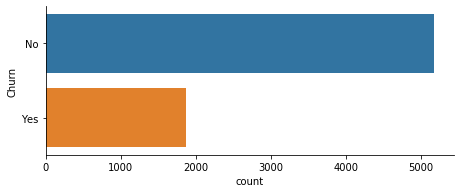

In [15]:
ax = sns.catplot(y="Churn", kind="count", data=df, height=2.6, aspect=2.5, orient='h')

Churn: No - 72.4%

Churn: Yes - 27.6%

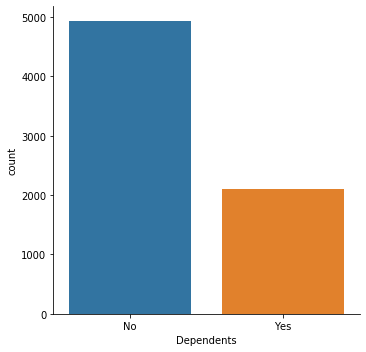

In [16]:
sns.catplot(x="Dependents", kind="count", data=df)
plt.show()

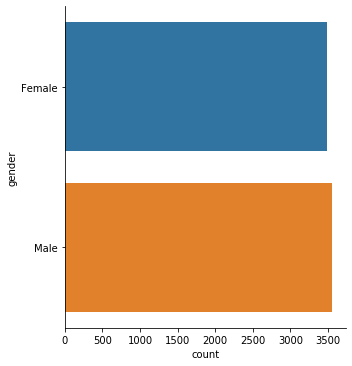

In [17]:
sns.catplot(y="gender", kind="count", data=df)
plt.show()

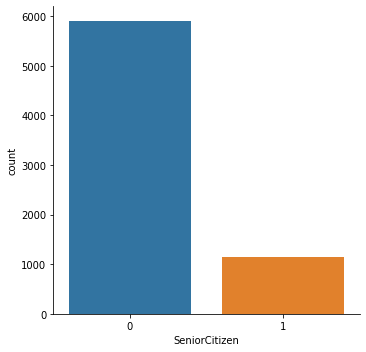

In [18]:
sns.catplot(x="SeniorCitizen", kind="count", data=df)
plt.show()

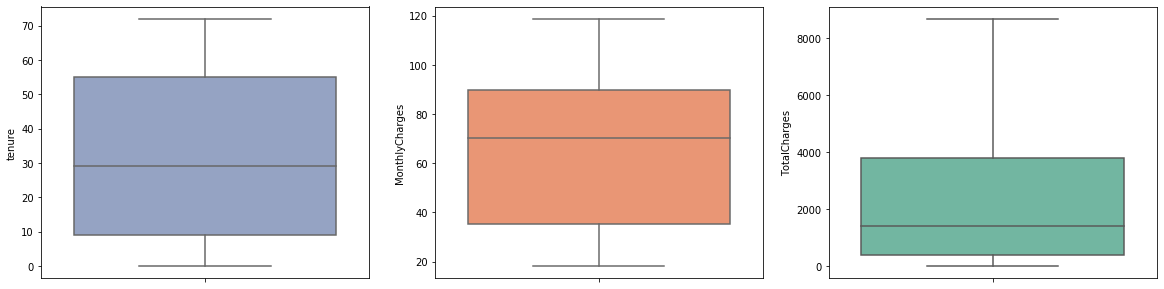

In [19]:
fig = plt.figure(figsize=(20,5))

fig.add_subplot(131)
sns.boxplot(data=df, y="tenure", color="#8da0cb")
sns.color_palette("BuGn_r")
fig.add_subplot(132)
sns.boxplot(data=df, y="MonthlyCharges", color="#fc8d62")

fig.add_subplot(133)
sns.boxplot(data=df, y="TotalCharges", color="#66c2a5")
plt.show()

In [20]:
gender_map = {"Female" : 0, "Male": 1}
yes_no_map = {"Yes" : 1, "No" : 0}

df["gender"] = df["gender"].map(gender_map)

def binary_encode(features):
    for feature in features:
        df[feature] = df[feature].map(yes_no_map)

In [21]:
binary_encode_candidate = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]
binary_encode(binary_encode_candidate)

In [22]:
df = pd.get_dummies(df)

In [23]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


In [24]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.011754,-0.014569,-0.000080,-0.008612,...,0.005374,0.006026,-0.010487,-0.003386,0.008026,-0.003695,-0.016024,0.001215,0.000752,0.013744
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.156530,0.220173,0.103006,0.150889,...,0.034210,-0.182742,0.120176,0.138360,-0.046262,-0.117000,-0.016159,-0.024135,0.171718,-0.153477
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,-0.014877,0.096848,0.317504,-0.150448,...,-0.117529,0.000615,0.117412,-0.280865,0.082783,0.248091,0.110706,0.082029,-0.083852,-0.095125
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.111377,-0.113890,0.062078,-0.164221,...,-0.078198,0.139812,-0.039741,-0.231720,0.068368,0.204613,0.052021,0.060267,-0.150642,0.059071
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.006152,0.247900,0.826178,-0.352229,...,-0.252220,-0.039062,0.286111,-0.645561,0.202570,0.558533,0.243510,0.233006,-0.208363,-0.233852
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.016505,0.247398,0.113214,0.011942,...,-0.112254,0.172209,-0.032959,-0.000742,-0.002791,0.003519,0.007556,-0.007721,0.003062,-0.003319
PaperlessBilling,-0.011754,0.156530,-0.014877,-0.111377,0.006152,0.016505,1.000000,0.352150,0.158574,0.191825,...,0.059488,-0.321013,0.211716,0.169096,-0.051391,-0.147889,-0.016332,-0.013589,0.208865,-0.205398
MonthlyCharges,-0.014569,0.220173,0.096848,-0.113890,0.247900,0.247398,0.352150,1.000000,0.651174,0.193356,...,0.018075,-0.763557,0.627429,0.060165,0.004904,-0.074681,0.042812,0.030550,0.271625,-0.377437
TotalCharges,-0.000080,0.103006,0.317504,0.062078,0.826178,0.113214,0.158574,0.651174,1.000000,-0.198324,...,-0.202188,-0.375223,0.520122,-0.444255,0.170814,0.354481,0.185987,0.182915,-0.059246,-0.295758
Churn,-0.008612,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.191825,0.193356,-0.198324,1.000000,...,0.130845,-0.227890,0.061382,0.405103,-0.177820,-0.302253,-0.117937,-0.134302,0.301919,-0.091683


In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,7043.0,0.504756,0.500013,0.00,0.00,1.00,1.00,1.00
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
Partner,7043.0,0.483033,0.499748,0.00,0.00,0.00,1.00,1.00
Dependents,7043.0,0.299588,0.458110,0.00,0.00,0.00,1.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
PhoneService,7043.0,0.903166,0.295752,0.00,1.00,1.00,1.00,1.00
PaperlessBilling,7043.0,0.592219,0.491457,0.00,0.00,1.00,1.00,1.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80
Churn,7043.0,0.265370,0.441561,0.00,0.00,0.00,1.00,1.00


In [27]:
result = pd.DataFrame(columns=["Features", "Chi2Weights"])

for i in range(len(df.columns)):
    chi2, p = chisquare(df[df.columns[i]])
    result = result.append([pd.Series([df.columns[i], chi2], index = result.columns)], ignore_index=True)

In [28]:
result = result.sort_values(by="Chi2Weights", ascending=False)
result.head(20)


,Features,Chi2Weights
8,TotalCharges,1.587216e+07
4,tenure,1.312128e+05
7,MonthlyCharges,9.845178e+04
11,MultipleLines_No phone service,6.361000e+03
1,SeniorCitizen,5.901000e+03
35,Contract_One year,5.570000e+03
38,PaymentMethod_Credit card (automatic),5.521000e+03
20,OnlineBackup_No internet service,5.517000e+03
15,InternetService_No,5.517000e+03
32,StreamingMovies_No internet service,5.517000e+03


In [30]:
new_df = df[result["Features"].head(20)]
new_df.head()

,TotalCharges,tenure,MonthlyCharges,MultipleLines_No phone service,SeniorCitizen,Contract_One year,PaymentMethod_Credit card (automatic),OnlineBackup_No internet service,InternetService_No,StreamingMovies_No internet service,StreamingTV_No internet service,TechSupport_No internet service,DeviceProtection_No internet service,OnlineSecurity_No internet service,PaymentMethod_Bank transfer (automatic),PaymentMethod_Mailed check,Contract_Two year,Churn,OnlineSecurity_Yes,TechSupport_Yes
0,29.85,1,29.85,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1889.50,34,56.95,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,108.15,2,53.85,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
3,1840.75,45,42.30,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1
4,151.65,2,70.70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


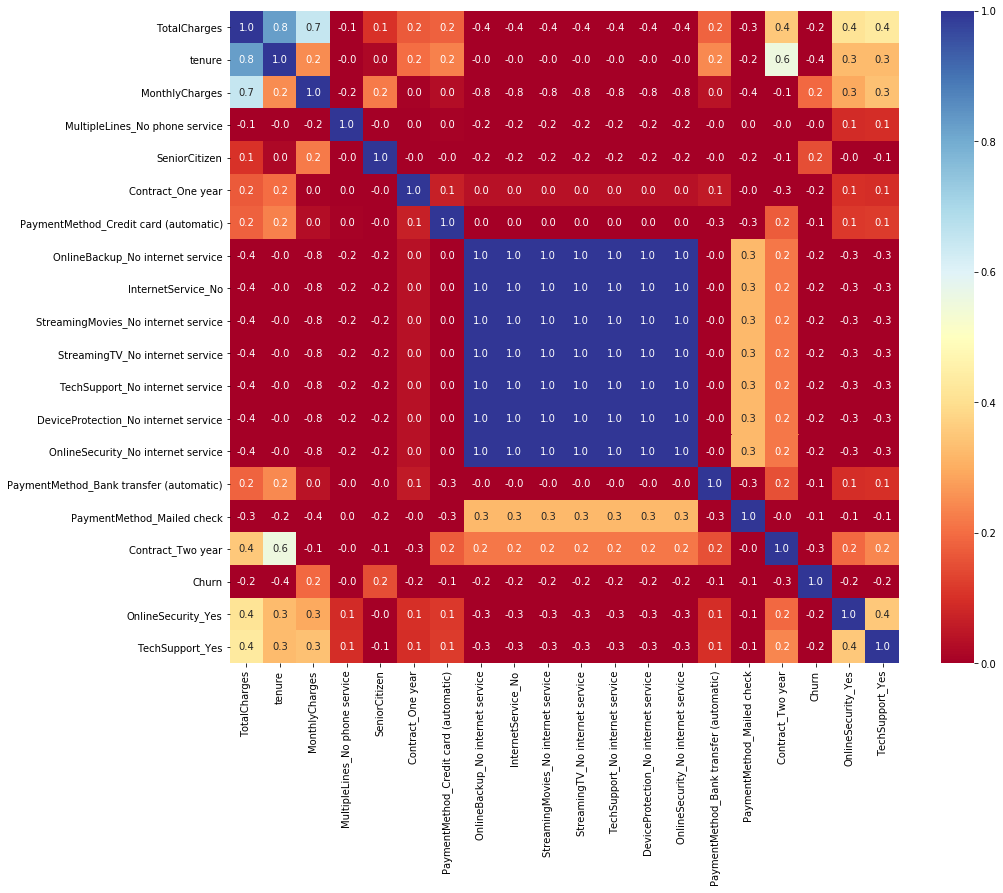

In [31]:
plt.figure(figsize = (15, 12))
sns.heatmap(new_df.corr(), cmap="RdYlBu", annot=True, fmt=".1f", vmin=0, vmax=1)
plt.show()

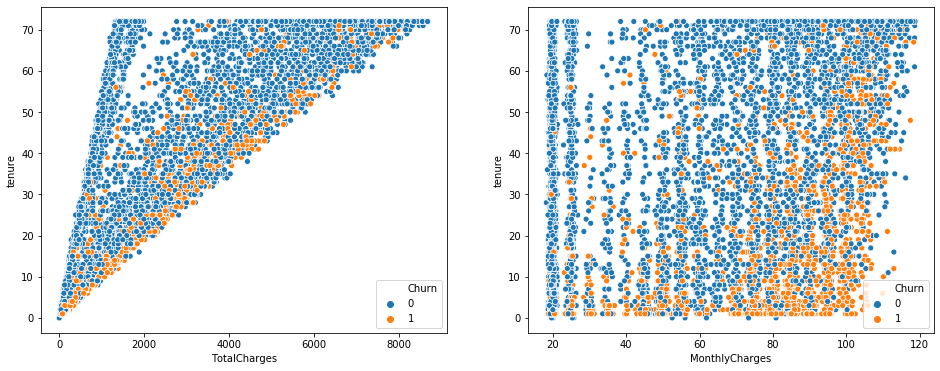

In [33]:
_, ax = plt.subplots(1, 2, figsize= (16, 6))
sns.scatterplot(x="TotalCharges", y = "tenure" , hue="Churn", data=new_df, ax=ax[0])
sns.scatterplot(x="MonthlyCharges", y = "tenure" , hue="Churn", data=new_df, ax=ax[1])
plt.show()

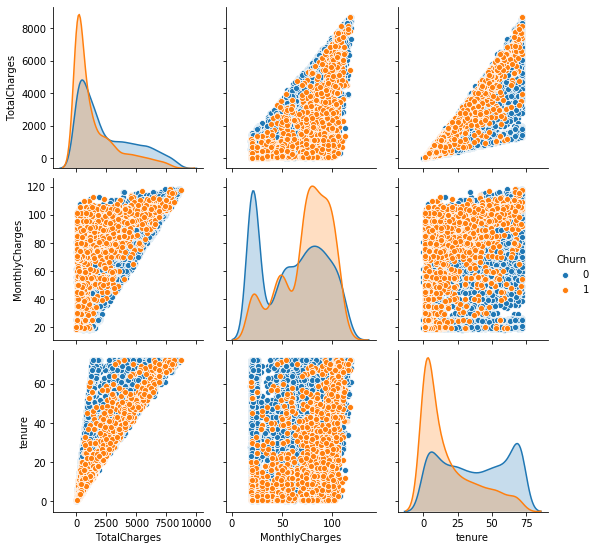

In [35]:
cols = ["TotalCharges", "MonthlyCharges", "tenure", "Churn"] 
pairplot_feature = new_df[cols]
sns.pairplot(pairplot_feature, hue = "Churn")
plt.show()

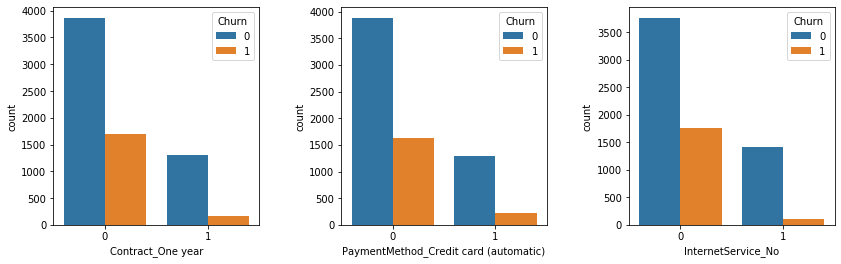

In [36]:
fig, ax = plt.subplots(1,3, figsize=(14, 4))
plt.subplots_adjust(wspace=0.4)
sns.countplot(x = "Contract_One year", hue="Churn" , ax=ax[0], data=new_df)
sns.countplot(data = new_df, x = "PaymentMethod_Credit card (automatic)", ax=ax[1], hue="Churn")
sns.countplot(data = new_df, x ="InternetService_No", ax=ax[2], hue="Churn")
fig.show()

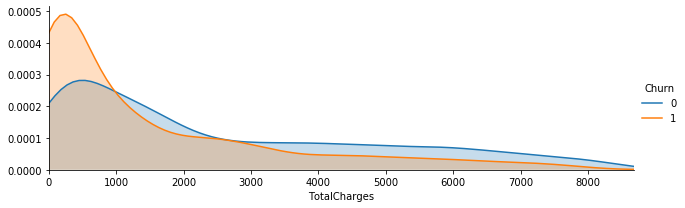

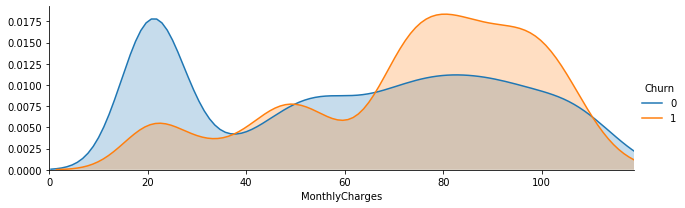

In [37]:
facet = sns.FacetGrid(new_df, hue = "Churn", aspect = 3)
facet.map(sns.kdeplot,"TotalCharges",shade= True)
facet.set(xlim=(0, new_df["TotalCharges"].max()))
facet.add_legend()

facet = sns.FacetGrid(new_df, hue = "Churn", aspect = 3)
facet.map(sns.kdeplot,"MonthlyCharges",shade= True)
facet.set(xlim=(0, new_df["MonthlyCharges"].max()))
facet.add_legend()